Autor: Iván Gustavo Nieto

<h3> <font color = #5DADE2><b>Introducción </b></font></h3>
<h4><font color = #F09426 > El sistema de encriptación monoalfabético se basa en hacer una asignación a cada una de las letras del mensaje que se pretende codificar y enviar. A lo largo de este cuadernillo desarrollaremos algunas funciones y bloques de código que puedan analizar y desencriptar textos codificados bajo una transformación afín.</font></h4>

<h3> <font color = #5DADE2><b>Importe de modulos </b></font></h3>

In [1]:
# -------------------------------------------------------------------
# Manejo de datos y graficos
# -------------------------------------------------------------------
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------------------------------------------
# Estilo del comando print
# -------------------------------------------------------------------
from colorama import Fore
from colorama import Style

import urllib


<h4><font color = #F09426 >
La codificación basada en una transformación afín corresponde con una congruencia de la forma:
$$ C \equiv aP + b \text{ }(mod \text{ } m)$$
donde $0 \leq a,b < m$, $(a,m) =1$ y  $ a \neq 0$. El valor de $m$ representa el número de caracteres en el alfabeto. </font> </h4>
<h4><font color = #F09426>
La forma de decifrar estos textos es usando la frecuencia con que aparece cada letra.
Usaremos archivos csv construidos usando web scraping los cuales se pueden encontrar en el siguiente </font> <a href = "https://github.com/ivanc998/IN-Portfolio/tree/main/Project-Decrypt"> enlace</a>. </h4> 

<h3> <font color = #5DADE2><b>Definición de funciones auxiliares</b></font></h3>
<h4> <font color = #F09426> El sistema de cigrafo por transformación afín se basa fuertemente en el hecho de poder establecer un sistema de congruencias y su 
respectiva solución. Una herramienta de vital importancia es el calculo del maximo común divisor entre dos entros positivos. Función 
que se define a continuación. </font> </h4>

In [2]:
def GCD(a, b):
    
    # Calculate the greatest common divisors of the integers a and b
    if b == 0:
        return a
    return GCD(b, a % b)

<h4> <font color = #F09426> La forma de decifrar este tipo de mensajes es suponer que la letra más frecuente en el criptagrama está asociada a la letra más 
frecuente en el conjunto de todas la palabras del ingles. Una vez hecha esta suposición debemos verificar si es posible encontrar
valores $a,b$ que cumplan todas las condiciones mencionadas en un principio. Para ello contruimos una función que dados los coeficientes
supuestos en la asignación inicial encuentra los valores posibles para lograr decifrar el mensaje. </font> </h4>

In [3]:
def linear_congruences(x1, C1, x2, C2, m):
    
    # Find the solutios a and b to the system of linear congruences 
    # ax_1 + b ≡ C1(mod m), ax_2 + b ≡ C2(mod m) where (a,m) = 1,  a ≤ a,b < m and a≠0
    
    relative_primes = [x for x in range(1, m+1) if GCD(x, m) == 1] # Find all relative primes of m
    solutions = [] # List to save all solutions that be found

    for b in range(0, m):
        for a in relative_primes:
            if (((a*x1) + b - C1) % m == 0) and (((a*x2) + b - C2) % m == 0): # Verify all possible pairs in the congrences. 
                solutions.append((a,b)) # If the pair satifies then it is added to the list
                
    return solutions

<h4> <font color = #F09426> Una vez se tienen los candidatos para los enteros $a,b$ entonces se calcula la transformación inversa y se aplica a cada caracter del mensaje para decodificarlo. </font> </h4>

In [4]:
def decrypt_affine_transformation(a, b, m, encrypt_text):
    
    # Decrypt the given text aplying the inverse transformation of ax + b ≡ C(mod m) 
    # Inverse tranformtion x ≡ i(C - b)(mod m) where ia ≡ 1(mod m)
    decrypt_text = ""
    
    # -------------------------------------------------------------------
    # Find the inverse of a mod m
    # -------------------------------------------------------------------
    for i in range(1,m): 
        if (((i*a) - 1) % m ) == 0:
            inverse_a = i
            break
    
    # -------------------------------------------------------------------
    # Aply the inverse tranformation to each word on the message
    # -------------------------------------------------------------------
    for c in encrypt_text:
        if (97 <= ord(c)) and (ord(c) <= 122):
            x = ord(c)-97
            P = ((inverse_a*(x -b)) % m) + 97
            decrypt_text += chr(P)
    return decrypt_text

<h3> <font color = #5DADE2><b>Palabras en el inglés</b></font></h3>
<h4> <font color = #F09426> Como mencionamos anteriormente la estrategia será asociar las letras más frecuentes en el ingles a las más frcuentes en el idioma.
Para ello traeremos los datos necesarios del repositorio de git hub y lo prepararemos para su uso. </font> </h4>

In [5]:
# --------------------------------------------------------------------------------------------------------------------
# Extrect the database with the frecuency of each letter of a repository in gitgub
# --------------------------------------------------------------------------------------------------------------------

url = 'https://github.com/ivanc998/IN-Portfolio/blob/main/Project-Decrypt/csv-files/Frecuency_letters.csv?raw=true' 
words_frecuency = pd.read_csv(url, delimiter = ';') # Cargamos el archivo csv

words_frecuency = words_frecuency.sort_values('stats', axis = 'index', ascending = False, ignore_index = True) # Sort descending the data

# Verify the data are complete and not require be clean
print(words_frecuency.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Letter  26 non-null     object
 1   stats   26 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 544.0+ bytes
None


In [6]:
words_frecuency.transpose().head(2)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
Letter,e,i,a,r,n,t,o,s,l,c,...,y,b,f,v,w,k,z,x,q,j
stats,71312,62067,60076,55180,51921,51652,48487,43672,43138,35632,...,17547,15861,10213,8819,5961,5522,3150,2956,1814,1373


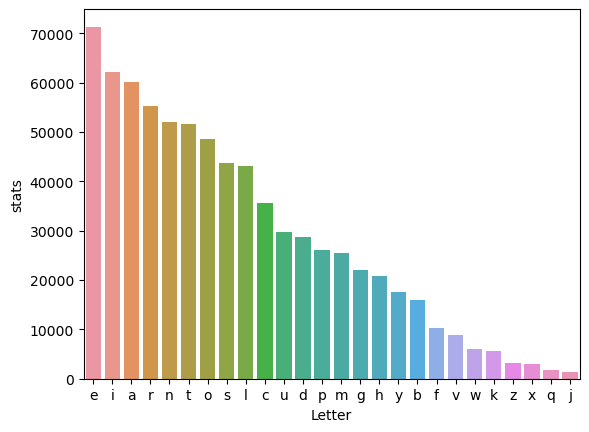

In [7]:
sns.barplot(data = words_frecuency, x = 'Letter', y = 'stats')
plt.show()

<h3> <font color = #5DADE2><b>Mensaje a desencriptar</b></font></h3>
<h4><font color = #F09426>Ahora haremos un proceso similiar al texto que queremos desencriptar. Para ello lo ingresaremos como cadena de texto y crearemos una función que retorne un dataframe con la frecuencia de sus letras. </font></h4>

In [8]:
# --------------------------------------------------------------------------------------------------------------------
# Define function to prepare de message
# --------------------------------------------------------------------------------------------------------------------

def prepare_cryptogram(Text, info):
    cryptogram = Text.replace(' ', '').lower() # Drop ths blank space and become to lower case each letter

    # --------------------------------------------------------------------------------------------------------------------
    # Dataframe of the cryptogram 
    # --------------------------------------------------------------------------------------------------------------------
    letters_cryptogram = [x for x in cryptogram] # Put each character on a list
    aux_df = pd.DataFrame({'lt' : letters_cryptogram}) # Create a dataframe with the list

    Serie = aux_df['lt'].groupby(aux_df['lt']).count() # Find the frecuency of each letter
    sk = Serie.index.tolist()
    Frecuency = [Serie[t] for t in sk] # Build a list with each frecuency
    
    # Join all in a dataframe
    df_cryptogram = pd.DataFrame({'Letter' : sk, 'Frecuency' : Frecuency}).sort_values('Frecuency', ascending = False, ignore_index = True) 
    
    # --------------------------------------------------------------------------------------------------------------------
    # Clean the dataframe 
    # --------------------------------------------------------------------------------------------------------------------
    for J in range(df_cryptogram.shape[0]): # We analyze ech row on the dataframe
    
        lt = df_cryptogram.iloc[J]['Letter'] # Obtain the value in the 'Letter' column
    
        if not(97 <= ord(lt) and ord(lt) <= 123): # If it is not an alphabet element then it is remplaced by a None value
            df_cryptogram.iloc[J, df_cryptogram.columns.get_loc('Letter')] = None
    if info:
        print(f"It has been found {Fore.BLUE}{df_cryptogram.isnull().sum()['Letter']}{ Style.RESET_ALL} element(s) out the alphabet") # Show which elemnts was found
    
    df_cryptogram.dropna(inplace = True)
    df_cryptogram.reset_index(inplace = True,  drop = True)
    
    return [df_cryptogram, cryptogram]

<h4><font color = #F09426>Tratemos de decodificar un texto encriptado con los parámetros $a=5$ y $b=8$. </font></h4>

In [9]:
Text = """pcix wvms ivaf cvya epqw vxza npwl lwiv zvco oapl xuiv xzig cyae zaiv colc jcla hcvm
lwur livm eimc lcip vwvm wzqi yhcc llwg ciul aofp ascu unez wzwu chhc szwj c"""

cryptogram_data = prepare_cryptogram(Text, True)
cryptogram_data[0].transpose().head(2)

It has been found 1 element(s) out the alphabet


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
Letter,c,v,i,w,l,a,z,p,u,m,...,h,o,s,y,n,q,j,g,f,r
Frecuency,17,12,11,11,11,9,8,6,6,5,...,4,4,3,3,2,2,2,2,2,1


In [10]:
cryptogram_data[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Letter     22 non-null     object
 1   Frecuency  22 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 480.0+ bytes


<h3> <font color = #5DADE2><b>Decifrado</b></font></h3>
<h4><font color = #F09426> La forma de proceder en este punto es probar todas las formas de asignar los valores mas frecuentes en el criptograma teniedo como referencia el dataframe words_frecuency, generar el sistema de congruencias lineales y finalmente vericar si este posee solución. Por cada asignación cuyo sistema tenga solución, tendremos tantas formas de desencriptar como soluciones encontremos. Así debemos analizar cada mensaje y encontrar el que de como resultado un texto legible.</h4>

In [11]:
def higher_frequency_assignations(words_frecuency, cryptogram_data):
    
    df_cryptogram, cryptogram = cryptogram_data[0], cryptogram_data[1]
    
    options_decrypt = [] # List to add all ways decrypt the

    # --------------------------------------------------------------------------------------------------------------------
    # Assign the most frequent values on the crytogram
    # --------------------------------------------------------------------------------------------------------------------
    C1 = ord(df_cryptogram.iloc[0]['Letter']) - 97 
    C2 = ord(df_cryptogram.iloc[1]['Letter']) - 97

    fw_size = words_frecuency.shape[0] # Define the length of dataframe  with words list

    # --------------------------------------------------------------------------------------------------------------------
    # Do the possible assignations of the most frequent values
    # --------------------------------------------------------------------------------------------------------------------
    for i in range(fw_size - 1):
        for j in range(i+1, fw_size):

            x1 = ord(words_frecuency.iloc[i]['Letter']) - 97
            x2 = ord(words_frecuency.iloc[j]['Letter']) - 97

            solutions = linear_congruences(x1 = x1, C1 = C1, x2 = x2 , C2 = C2, m = 26) # Verify if is possible the assignation 

            if len(solutions) != 0:
                for s in solutions: # Use the solutions to decrypt the mesagge
                    m = decrypt_affine_transformation(a = s[0], b = s[1], m = 26, encrypt_text = cryptogram)
                    options_decrypt.append(m) # Save the result
    return(options_decrypt) 

In [53]:
options_decrypt = higher_frequency_assignations(words_frecuency, cryptogram_data)

<h4><font color = #F09426>Dada la cantidad de opciones, mostraremos en pantalla solo las primeras $10$. </font></h4>

In [13]:
cont = 1
for x in options_decrypt:
    print(Fore.BLUE, '-------------------------------------------')
    print(f'  Option {cont}') 
    print(Fore.BLUE, '-------------------------------------------', Style.RESET_ALL)
    print('\t',x)
    cont += 1
    if cont == 11:
          break
print('\nTotal options: ', len(options_decrypt))

 -------------------------------------------
  Option 1
 ------------------------------------------- 
	 readingcanopenyourmindtobrilliantnewworldsandtakeyoutoanewlevelofenglishlanguagelearningitmayfeellikeaslowprocessbutitiseffective
 -------------------------------------------
  Option 2
 ------------------------------------------- 
	 reglctqsgtmfetumwractldmzrchhcgtdteiimrhlkgtldgoeumwdmgteihepehmxetqhckjhgtqwgqehegrtctqcdaguxeehhcoegkhmifrmsekkzwdcdckexxesdcpe
 -------------------------------------------
  Option 3
 ------------------------------------------- 
	 reyjkluoylgbeligcrqkljhgtrkvvkylhlessgrvjmyljhyaeigchgylesvexevgzeluvkmpvylucyueveyrlklukhqyizeevvkaeymvgsbrgoemmtchkhkmezzeohkxe
 -------------------------------------------
  Option 4
 ------------------------------------------- 
	 reqhsdykqdaxedwairgsdhlanrsjjsqdldeccarjhoqdhlqmewailaqdecjefejabedyjsovjqdyiqyejeqrdsdyslgqwbeejjsmeqojacxrakeoonilslsoebbeklsfe
 -------------------------------------------
  Option 5
 -------

<h4><font color = #F09426> Se puede observar que la opción $1$ presenta un texto legible. Sin embargo con las herramientas que tenemos hasta ahora, hay un sistema ineficiente a la hora de detectar el texto correcto, ya que tenemos un total de 156 opciones que deberiamos analizar manualmente para poder encontrar el texto correcto. </font></h4>
<h4><font color =#F09426>
Vamos a fijar nuestro objetivo ahora en corregir este aspectos del programa, de tal forma que el sistema reconozca cual de sus opciones es la correcta y pueda agregar de los espacios correspondientes para recuperar el mensaje original con mayor efectividad. </font></h4>

<h4><font color =#F09426>
Será necesario para el sistema acceder de manera constante a la información de los datadrame con la listade la palabras; por lo cual importaremos cada uno de ellos para mejorar el procesamiento de la información.</font></h4>

In [14]:
dfs = {}

for x in range(97, 123):
    Key = True
    L = chr(x)
    url = f'https://github.com/ivanc998/IN-Portfolio/blob/main/Project-Decrypt/csv-files/{L.upper()}_words.csv?raw=true'
    
    while Key:
        try:
            dfs[L] = pd.read_csv(url, index_col = 0)
            Key = False
        except Exception as e:
            if not (type(e) is urllib.error.URLError):
                print(e)
                break

<h4><font color =#F09426>
Ahora definimos una función que dado un texto pueda recorrerlo y detectar las palabras que en el se encuentran; finalmente retornar un porcentaje del texto reconocido junto con los espacios en las palabras encontradas.
</font></h4>

In [92]:
def percent_real_text(Text, df):
    if type(Text) is str:
        Text = Text.replace(' ','').lower()
        tabular_text = ''
        skips = 0
        index = 0
        
        while index < len(Text):
            if 97 <= ord(Text[index]) and ord(Text[index]) <= 122:
                
                Ls = df[Text[index]]['Length'].groupby(df[Text[index]]['Length']).count().sort_values(ascending = False).index.tolist()
                Lst = [int(x) for x in Ls if x <= len(Text) - index]
                
                try: 
                    last_length = Lst[-1]
                    min_length = min(Lst)
                except:
                    min_length = 2*(len(Text) - index)
                
                for j in Lst:
                    if index + j - 1 < len(Text): 
                        aux_text = Text[index : (index + j)]
                    
                        if(aux_text in df[Text[index]].values): 
                            index += j
                            tabular_text +=  ('{F_G}' + aux_text + '{S} ')
                            break
                        else:
                            if j == last_length:
                                tabular_text += ('{F_R}' + Text[index] + '{S}')
                                
                                skips += 1
                                index += 1
                if len(Text) - index < min_length:
                    tabular_text += ('{F_R}' + Text[index:] + '{S}')
                    
                    skips += (len(Text) - index)
                    index = len(Text)
                    
                    
            else:
                tabular_text += ('{F_R}'+ Text[index] + '{S}')
                
                skips +=1
                index += 1
        return list([(1 - (skips/len(Text)))*100, tabular_text])
                
            
    else:
        raise TypeError('Text was expected being a str object')

<h4><font color =#F09426>El bloque de código anterior recibe como paramétro un texto y determina que tanto del mismo puede reconocer como texto legible. Para ello retorna una lista de dos componentes, la primera es un número real que representa de manera porcentual el texto encontrado y en la segunda contiene paramétro entregado, agregando algunos espacios según haya identificado las palabras, junto con algunos caractéres que serán usados para estilizar el resultado. La función <b>'percent_real_text'</b> debe ser usada en conjunto con la función <b>'filter_encrypt_options'</b> que definiremos posteriormente para poder usar los elementos de estilo ya mencionados. Sin embargo, antes de poder construirla debemos establecer cual es un porcentaje admisible para aceptar un texto como valido.</font></h4>

<h3> <font color = #5DADE2><b>Casos de prueba</b></font></h3>
<h4><font color = #F09426> Usaremos el siguiente dataframe para probar la efectividad de nuestro código.</h4>

In [123]:
url = 'https://github.com/ivanc998/IN-Portfolio/blob/main/Project-Decrypt/csv-files/Test_recognize_words.csv?raw=true'
df_test = pd.read_csv(url, index_col = 0) 
df_test.head(6)

,Real text,Affine encrypt,Exchange encrypt,random_text
0,NaN,NaN,NaN,dumejyhmbgonvs czhthgouyujomevlrjlieyvyueecycy...
1,Computer programming is the process of perform...,saqfezcpf pampi q q wvmwuz rcfpascu uahfcp hap...,dsarhupxr xs oxcaav yovguz prxsdpgg s j rpxj s...,vaghhfwgqbetzpenjrzmudrbrsgfka wmhlhyuqfbrdjt...
2,Tasks accompanying and related to programming ...,ziugu issaqfi vy wvmivxpc lizcx zafpamp i qqwv...,ucgtgcd dsarcyfvy ocy kxpwc upku srxs oxcaavyo...,zvtclrvipvhqijutjgp euqv j kwrodjpfdfcmhmmecq...
3,Programmable devices have existed for centurie...,fpampiqqi nlcxcjws curijcctw u zcxhapsc v zep ...,rxsoxca ac qwpkpmv d pgzcmppb vgupkjsxd pyu h ...,vxpnikxpwdmteiifputttxamlu migragxbumkdpnjljsc...
4,Codebreaking algorithms have also existed for ...,saxc npcig wvmilma pwzrq urijcilu actwuzcx ha ...,dskpq x p ctvyoc wosxvuz agzcmpc wgs pbvgupkjs...,hdqgemg mcobwosopcprkgwyclwuuouyqxqfuxwhspbzdj...
5,The first computer program is generally dated ...,zr chwpuzs aqfezcp fpampiqwu mcv cpi llyx izcx...,uz p jv xgudsarh up xrxsoxcav go pyp xcwwf k c...,zeoffvzy bqkjfqi fuoanrdamwfclcwyrzoswbhdqgnhp...


<h4><font color = #F09426>Aquí contamos con cuatro campos. El primero, consta de fragmetos obtenidos de la página <a href = "https://en.wikipedia.org/wiki/Computer_programming"> https://en.wikipedia.org/wiki/Computer_programming</a> haciendo uso de web scraping, el segundo y tercero decodifican los textos del primero con transformación afín e intercambio aleatorio de letras respectivamente. Finalmente, el último campo fue generado con textos generados de manera aleatoria.</font></h4>

In [124]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Real text         31 non-null     object
 1   Affine encrypt    31 non-null     object
 2   Exchange encrypt  31 non-null     object
 3   random_text       32 non-null     object
dtypes: object(4)
memory usage: 1.2+ KB


In [125]:
df_test.dropna(inplace = True)
df_test.drop_duplicates(inplace = True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 1 to 31
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Real text         31 non-null     object
 1   Affine encrypt    31 non-null     object
 2   Exchange encrypt  31 non-null     object
 3   random_text       31 non-null     object
dtypes: object(4)
memory usage: 1.2+ KB


<h4><font color =#F09426>Ahora creamos nuevos campos en los que incluimos el porcentaje de reconocmiento asignado por el sistema. </font></h4>

In [126]:
real_texts = df_test['Real text']
P_real_field = [percent_real_text(T, dfs)[0] for T in real_texts]
df_test.insert(1, 'Percent R_T', P_real_field)

affine_texts  = df_test['Affine encrypt']
P_affine_field = [percent_real_text(T, dfs)[0] for T in affine_texts]
df_test.insert(3, 'Percent A_T', P_affine_field)

exchange_texts = df_test['Exchange encrypt']
P_exchange_field = [percent_real_text(T, dfs)[0] for T in exchange_texts]
df_test.insert(5, 'Percent E_T', P_exchange_field)

random_texts = df_test['random_text']
P_random_field = [percent_real_text(T, dfs)[0] for T in random_texts]
df_test.insert(7, 'Percent RD_T', P_random_field)

df_test.head(5)

,Real text,Percent R_T,Affine encrypt,Percent A_T,Exchange encrypt,Percent E_T,random_text,Percent RD_T
1,Computer programming is the process of perform...,93.609467,saqfezcpf pampi q q wvmwuz rcfpascu uahfcp hap...,33.372781,dsarhupxr xs oxcaav yovguz prxsdpgg s j rpxj s...,19.763314,vaghhfwgqbetzpenjrzmudrbrsgfka wmhlhyuqfbrdjt...,26.041667
2,Tasks accompanying and related to programming ...,94.240838,ziugu issaqfi vy wvmivxpc lizcx zafpamp i qqwv...,25.828970,ucgtgcd dsarcyfvy ocy kxpwc upku srxs oxcaavyo...,23.211169,zvtclrvipvhqijutjgp euqv j kwrodjpfdfcmhmmecq...,31.192661
3,Programmable devices have existed for centurie...,94.243070,fpampiqqi nlcxcjws curijcctw u zcxhapsc v zep ...,31.769723,rxsoxca ac qwpkpmv d pgzcmppb vgupkjsxd pyu h ...,18.976546,vxpnikxpwdmteiifputttxamlu migragxbumkdpnjljsc...,26.605505
4,Codebreaking algorithms have also existed for ...,93.728223,saxc npcig wvmilma pwzrq urijcilu actwuzcx ha ...,30.313589,dskpq x p ctvyoc wosxvuz agzcmpc wgs pbvgupkjs...,16.027875,hdqgemg mcobwosopcprkgwyclwuuouyqxqfuxwhspbzdj...,17.171717
5,The first computer program is generally dated ...,88.461538,zr chwpuzs aqfezcp fpampiqwu mcv cpi llyx izcx...,33.516484,uz p jv xgudsarh up xrxsoxcav go pyp xcwwf k c...,21.428571,zeoffvzy bqkjfqi fuoanrdamwfclcwyrzoswbhdqgnhp...,28.037383


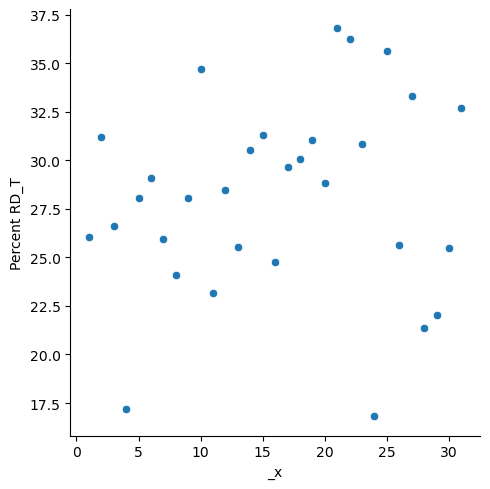

In [133]:
sns.relplot(data = df_test['Percent RD_T'])
plt.show()

In [104]:
def filter_encrypt_options(options_decrypt):
    
    found = False
    cont = 0
    
    for x in options_decrypt:
        
        A = percent_real_text(x, dfs)
        
        if A[0] >= 70:
            print(Fore.BLUE,'Decrypt message: ',Style.RESET_ALL, A[0],'%\n----------------\n', A[1].format(F_R = Fore.RED, S = Style.RESET_ALL, F_G = Fore.GREEN))
            found = True
    if not found:
        print(Fore.BLUE,'---------------------------\n  Any option was recognized\n ---------------------------\n', Style.RESET_ALL, '\n')

<h4><font color =#F09426>
Ahora debemos probar las opciones de decodificación hallados anteriormente con el reconocimiento de texto. Mostraremos unicamente aquellos que se hayan reconocido con al menos un $70\%$. </font></h4>

In [105]:
filter_encrypt_options(options_decrypt)

 Decrypt message:   100.0 %
----------------
 reading can open your mind to brilliant new world sand take you to anew level of english language learning it may feel like as low process but it is effective 


<h4><font color =#F09426>
Podemos ver que nuestro código ahora solo nos muestra una única opción y además ha reconocido el texto con un $100 \%$ de efectividad. Esto no significa para nada que el algoritmo sea completamente eficaz, sino que logró acomodar de alguna forma todo el texto con palabras conocidas. comparemos con el texto original para ver la precisión de desencriptación. </font></h4>


<h4><font color = 'red'>
"Reading can open your mind to brilliant new worlds and take you to a new level of English language learning.
It may feel like a slow process, but it is effective." </font></h4>

<h4><font color =#F09426>
Al haber filtrado todas las posibilidades el usuario ya podría terminar de acomodar el texto, agregando signos de puntuación y terminar de decifrar el mensaje encriptado. </font></h4>

<h3> <font color = #5DADE2><b>Motivación para nuevos proyectos</b></font></h3>
<h4><font color = #F09426> Intentemos el mismo proceso que ya hemos planteado con el mensaje:</font></h4>

<h4><font color = #F09426>
"accag eaeei kxaax ennxs gdgnl sexxp xmoex likhs uaate begxe oztgc kedmw xlzxe oxxxa hcvls em" </font></h4>

In [22]:
Text = 'accag eaeei kxaax ennxs gdgnl sexxp xmoex likhs uaate begxe oztgc kedmw xlzxe oxxxa hcvls em'
data = prepare_cryptogram(Text, False)

options_decrypt = higher_frequency_assignations(words_frecuency, data)

filter_encrypt_options(options_decrypt)

 ---------------------------
  Any option was recognized
 ---------------------------
  




<h4><font color = #F09426>
Como vemos bajo el uso de una transformación afín, habrá textos encriptados que no sea posible decodificar. Esto se debe al hecho de que hay muchas más formas de distribuir el alfabeto que formas de hacer la elección de $a$ y $b$, esto es, podemos decodificar un mensaje donde su solución no se podrá encontar unicamente con lo que aquí hemos planteado. Se puede extender el razonamiento que se ha aplicado, al asignar cada letra que aparezca en el criptograma; sin embargo hay un inconveniente al proceder de esta manera y es que al probar todas las formas posibles de hacer dichas asignaciones, habrán aquellas que difieran solo en unas pocas letras, con lo que si una es aceptada por el algoritmo de reconocimiento la otra también lo será, es decir, que nuevamente podría aparecer varias posibilidades para un mismo texto. </font></h4>